<a href="https://colab.research.google.com/github/IsaacJumito/IsaacJumito-BEDU_ProyectoEquipo5_AnalisisdatosPython/blob/main/Proyecto_equipo_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=10 color='Steelblue'><center> Proyecto Equipo 5 </center></font>

<font size=4> Integrantes:

*   Rodrigo Garmendia Issa
*   Jorge Arista
*   Isaac Moreno

<font size=6> NLP : Clasificación de reseñas de películas

# <font size=6> Planteamiento del problema

<font size= 3> La intención de este proyecto es clasificar las reseñas de películas con una valoración de positivas o negativas. Esta base de datos se obtuvo de la plataforma [Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews), dicha base cuenta con un total de 50,000 reseñas de películas extraídas de la página de [IMDB](https://www.imdb.com/). 
Para llevar a cabo el proyecto se relizaron diversas técnicas de NLP para la visualización y comprensión de los datos, así como el uso de Regresión Logística para realizar la clasificación y se aplicaron de diversas métricas para medir el desempeño del modelo.

# <font size=6> Exploración de datos
<font size=3> Como se mencionó previamente, se trabajó con la base de datos encontrada en Kaggle, el *dataset* se subió en cuatro archivos distintos en el Github de [Rodrigo](https://github.com/ruderikissa/BEDU/tree/main), esto por motivos de limitación de espacio. Posteriormente estos archivos se leyeron y unieron nuevamente en el *Notebook*.

Lo primero que se realizó fue importar las bibliotecas requeridas para la exploración y análisis de los datos. Dado que estamos trabajando con archivos de texto, entre estas herramientas se encuentra NLTK para el procesamiento de lenguaje natural.

In [ ]:
!pip install nltk
import nltk  # herramientas para el análisis de NLP
import seaborn as sns 
from pylab import * # numpy y matplotlib.pyplot
import pandas as pd  
import re    # análisis de patrones en str
nltk.download('punkt')       # lista de palabras vacías
nltk.download('stopwords')   # y puntación en inglés

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<font size=3> Se importan y leen los 4 archivos que contienen el *data set* a explorar

In [ ]:
data1 = pd.read_csv('https://raw.githubusercontent.com/ruderikissa/BEDU/main/neg_rev1', index_col=0)
data2 = pd.read_csv('https://raw.githubusercontent.com/ruderikissa/BEDU/main/neg_rev2', index_col=0)
data3 = pd.read_csv('https://raw.githubusercontent.com/ruderikissa/BEDU/main/pos_rev1', index_col=0)
data4 = pd.read_csv('https://raw.githubusercontent.com/ruderikissa/BEDU/main/pos_rev2', index_col=0)

<font size=3> Se unen los archivos y se verifica que se haya realizada correctamente





In [ ]:
data = pd.concat([data1,data2,data3,data4],ignore_index=True)
data

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
49995,"I loved it, having been a fan of the original ...",positive
49996,Imaginary Heroes is clearly the best film of t...,positive
49997,I got this one a few weeks ago and love it! It...,positive
49998,John Garfield plays a Marine who is blinded by...,positive


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<font size=3> Notamos que el *data set* únicamente cuenta con dos columnas: la reseña hecha y la valoración positiva o negativa de la misma, ambas columnas de tipo *'object'*


Ahora, checamos cuántas reseñas hay de acuerdo a cada sentimiento.



In [ ]:
data.groupby('sentiment').count()

,review
sentiment,
negative,25000
positive,25000


> *Con esto, logramos ver que tenemos una completa igualdad en el número de 
reseñas tanto negativas como positivas, lo cual nos ayudara en los siguientes pasos*



<font size=3> Para hacer una análisis con mayor detalle dividiremos el *data frame* en dos: cada uno conteniendo las reseñas de un tipo de sentimiento. 

In [ ]:
# Data frame con las reseñas positivas
pos_rev = data.query('sentiment== "positive"').reset_index(drop=True)
pos_rev

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive
...,...,...
24995,"I loved it, having been a fan of the original ...",positive
24996,Imaginary Heroes is clearly the best film of t...,positive
24997,I got this one a few weeks ago and love it! It...,positive
24998,John Garfield plays a Marine who is blinded by...,positive


In [ ]:
# Data frame con las reseñas negativas 
neg_rev = data.query('sentiment=="negative"').reset_index(drop=True)
neg_rev

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
24995,This is your typical junk comedy.<br /><br />T...,negative
24996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
24997,I am a Catholic taught in parochial elementary...,negative
24998,I'm going to have to disagree with the previou...,negative


# <font size=6> Análisis de datos y visualización

<font size=3> Una vez explorado el *data set*, procedemos a analizar la información con la que contamos, para ello compararemos las reseñas de acuerdo al sentimiento conforme a la divisón que hicimos previamente.

Empezamos explorando la distribución de la cantidad de caracteres por reseña.

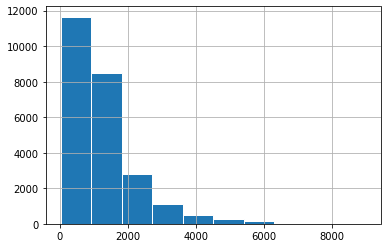

In [ ]:
# Histograma de cantidad de caracteres para reseñas negativas
neg_rev_len = neg_rev.review.apply(lambda x: len(x))
neg_rev_len
neg_rev_len.hist( ec='w' )


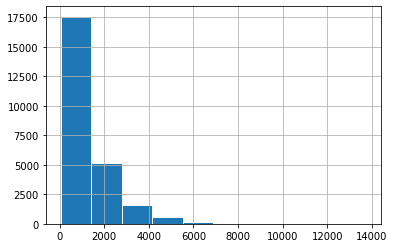

In [ ]:
# Histograma de cantidad de caracteres para reseñas positivas
pos_rev_len = pos_rev.review.apply(lambda x: len(x))
pos_rev_len.hist(ec='w')

<font size=3> Ahora, vemos la cantidad de palabras por reseña.

Text(0.5, 0, '# Reseñas')

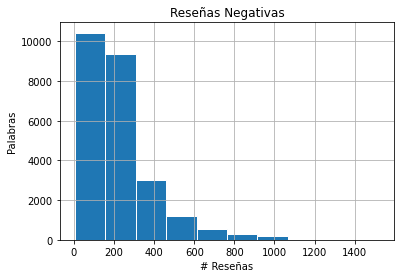

In [ ]:
#Definimos la función contadora d palabras
def word_count(review):
    words = review.split()
    return len(words)
# Aplicamos la función a las reseñas negativas y graficamos  
neg_rev_words = neg_rev.review.apply(word_count)
neg_rev_words.hist(ec='w')
plt.title('Reseñas Negativas')
plt.ylabel('Palabras')
plt.xlabel('# Reseñas')

Text(0.5, 0, '# Reseñas')

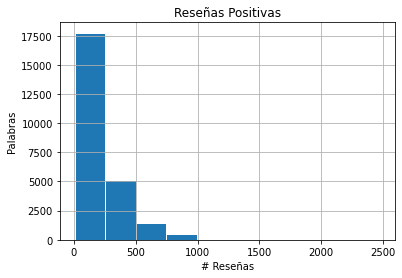

In [ ]:
# Aplicamos la función a las reseñas positivas y graficamos
pos_rev_words = pos_rev.review.apply(word_count)
pos_rev_words.hist(ec='w')
plt.title('Reseñas Positivas')
plt.ylabel('Palabras')
plt.xlabel('# Reseñas')



> *Con estos histogramas logramos dimensionar el número de palabras que se ocupan en las reseñas*



<font size=3> Visualizamos un ejemplo por cada sentimiento

In [ ]:
# Reseña negativa
neg_example = neg_rev.loc[24994][0]
neg_example

"Robert Colomb has two full-time jobs. He's known throughout the world as a globetrotting TV reporter. Less well-known but equally effortful are his exploits as a full-time philanderer.<br /><br />I saw `Vivre pour Vivre' dubbed in English with the title 'Live for Life.' Some life! Robert seems to always have at least three women in his life: one mistress on her way out, one on her way in, and the cheated wife at home. It helps that Robert is a glib liar. Among his most useful lies are `I'll call you tomorrow' and `My work took longer than planned.' He spends a lot of time and money on planes, trains and hotel rooms for his succession of liaisons. You wonder when this guy will get caught with his pants down.<br /><br />Some may find his life exciting, but I thought it to be tedious. His companions, including his wife, Catherine, are all attractive and desirable women. But his lifestyle is so hectic and he is so deceitful, you wonder if he's enjoying all this.<br /><br />Adding to the t

In [ ]:
# Reseña positiva 
pos_example = pos_rev.loc[1][0]
pos_example

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

#  <font size=6> Limpieza de datos

<font size=3> Notemos que las reseñas tienen varios caracteres que no son palabras ni aportan información relevante como era de esperarse, por lo que se procede a limpiar las reseñas. 

In [ ]:
# Se define la función de limpieza para las reseñas
from nltk.corpus import stopwords
def clean_review(review):
    # Se transforman en minúsculas todas las letras
    review = review.lower()
    # Se eliminan los caracteres de html
    review = re.sub(r'<.*?>',' ', review)
    # Se eliminan las ligas de internet
    review = re.sub(r'http[s]?.*',' ',review)
    # Se eliminan los dígitos
    review = re.sub('\d',' ',review)
    # Se eliminan el resto de caracteres que no sean letras.
    review = re.sub('[^\w]+',' ', review)
    # Se eliminan posibles espacios extras
    review = review.strip()
    return review

<font size=3> Aplicamos la limpieza a las reseñas. 

In [ ]:
neg_rev_clean = neg_rev.review.apply(clean_review)

In [ ]:
pos_rev_clean = pos_rev.review.apply(clean_review)

<font size=3> Y vemos un ejemplo previo y posterior a la limpieza por cada sentimiento.

1.   <font size=3> Reseña negativa sin limpieza:

In [ ]:
neg_example = neg_rev.loc[24994][0]
neg_example

"Robert Colomb has two full-time jobs. He's known throughout the world as a globetrotting TV reporter. Less well-known but equally effortful are his exploits as a full-time philanderer.<br /><br />I saw `Vivre pour Vivre' dubbed in English with the title 'Live for Life.' Some life! Robert seems to always have at least three women in his life: one mistress on her way out, one on her way in, and the cheated wife at home. It helps that Robert is a glib liar. Among his most useful lies are `I'll call you tomorrow' and `My work took longer than planned.' He spends a lot of time and money on planes, trains and hotel rooms for his succession of liaisons. You wonder when this guy will get caught with his pants down.<br /><br />Some may find his life exciting, but I thought it to be tedious. His companions, including his wife, Catherine, are all attractive and desirable women. But his lifestyle is so hectic and he is so deceitful, you wonder if he's enjoying all this.<br /><br />Adding to the t

2.   <font size=3> Reseña negativa limpia:

In [ ]:
neg_clean_example = neg_rev_clean[24994]
neg_clean_example

'robert colomb has two full time jobs he s known throughout the world as a globetrotting tv reporter less well known but equally effortful are his exploits as a full time philanderer i saw vivre pour vivre dubbed in english with the title live for life some life robert seems to always have at least three women in his life one mistress on her way out one on her way in and the cheated wife at home it helps that robert is a glib liar among his most useful lies are i ll call you tomorrow and my work took longer than planned he spends a lot of time and money on planes trains and hotel rooms for his succession of liaisons you wonder when this guy will get caught with his pants down some may find his life exciting but i thought it to be tedious his companions including his wife catherine are all attractive and desirable women but his lifestyle is so hectic and he is so deceitful you wonder if he s enjoying all this adding to the tedium is considerable footage that doesn t further the plot the

1.   <font size=3> Reseña positiva sin limpieza:

In [ ]:
pos_example = pos_rev.loc[1][0]
pos_example

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

2.   <font size=3>Reseña positiva limpia

In [ ]:
pos_clean_example = pos_rev_clean[1]
pos_clean_example

'a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done'

<font size=3> Ya hecha la limpieza, procedemos a 'tokenizar' las reseñas para seguir con nuestro análisis.

In [ ]:
neg_rev_clean = neg_rev_clean.apply(nltk.word_tokenize)
pos_rev_clean = pos_rev_clean.apply(nltk.word_tokenize)

<font size=3> Creamos un *'corpus'* de palabras que contienen cada tipo de reseña.

In [ ]:
neg_corpus = [words[i] for words in neg_rev_clean for i in range(len(words))]
pos_corpus = [words[i] for words in pos_rev_clean for i in range(len(words))]

<font size=3> Se crea un diccionario con los frecuencias de cada palabra en los *data frames* y visualizamos cuáles son las más fercuentes para cada sentimiento.

In [ ]:
# Diccionario de frecuencias
neg_freq_dist = nltk.FreqDist(neg_corpus)
pos_freq_dist = nltk.FreqDist(pos_corpus)

In [ ]:
# Las 30 más comunes de cada data frame
neg_30_most_common = np.array(list(map(lambda x: list(x), neg_freq_dist.most_common(30))))
pos_30_most_common = np.array(list(map(lambda x: list(x), pos_freq_dist.most_common(30))))

Text(0.5, 0, 'Palabras')

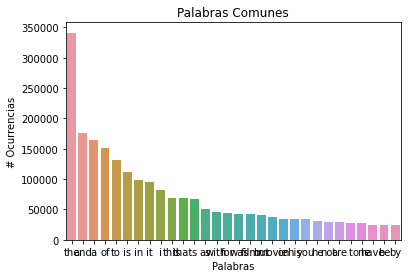

In [ ]:
fig = plt.Figure(figsize=(12,8))
#axes = fig.subplots(nrows=2, ncols=2)
#sns.barplot(x=neg_30_most_common[:,0], y=neg_30_most_common[:,1].astype('int'), ax= axes[0,0])
sns.barplot(x=pos_30_most_common[:,0], y=pos_30_most_common[:,1].astype('int'))
plt.title('Palabras Comunes')
plt.ylabel('# Ocurrencias')
plt.xlabel('Palabras')

<font size=3> Visualizamos la distribución de longitudes de todas las palabras.

Text(0.5, 0, 'Longitud')

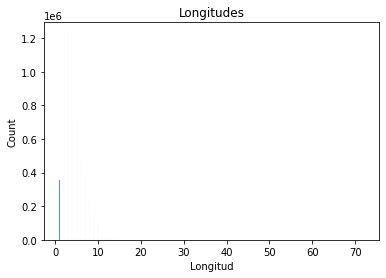

In [ ]:
neg_word_length = [len(word) for word in neg_corpus]
pos_word_length = [len(word) for word in pos_corpus]
#sns.displot(neg_word_length, kde=False)
sns.histplot(x=pos_word_length, kde=False)
plt.title('Longitudes')
plt.xlabel('Longitud')

<font size=3> Como era de esperarse las palabras más frecuentes son palabras vacías, es decir sirven como conectores sintácticos pero no aportan información, por lo que procedemos a eliminarlas.

In [ ]:
stopwords = stopwords.words('english') #Palabras vacías en inglés
neg_corpus_clean = [word for word in neg_corpus if word not in stopwords] 
pos_corpus_clean = [word for word in pos_corpus if word not in stopwords]

<font size=3> Creamos nuevamente el diccionario de frecuencias sin las palabras vacías y visualizamos.

In [ ]:
neg_freq_dist = nltk.FreqDist(neg_corpus_clean)
pos_freq_dist = nltk.FreqDist(pos_corpus_clean)

In [ ]:
neg_30_most_common = np.array(list(map(lambda x: list(x), neg_freq_dist.most_common(30))))
pos_30_most_common = np.array(list(map(lambda x: list(x), pos_freq_dist.most_common(30))))

Text(0, 0.5, 'Palabra')

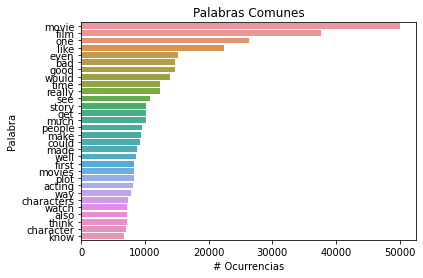

In [ ]:
fig = plt.Figure(figsize=(12,8))
#axes = fig.subplots(nrows=2, ncols=2)
sns.barplot(x=neg_30_most_common[:,1].astype('int'), y=neg_30_most_common[:,0])
plt.title('Palabras Comunes')
plt.xlabel('# Ocurrencias')
plt.ylabel('Palabra')
#sns.barplot(x=pos_30_most_common[:,0], y=pos_30_most_common[:,1].astype('int'))

<font size=3> También veamos la distribución de la longitud de palabras de estos nuevos *'corpus'.*

In [ ]:
neg_word_length = pd.Series([len(word) for word in neg_corpus_clean])
pos_word_length = pd.Series([len(word) for word in pos_corpus_clean])

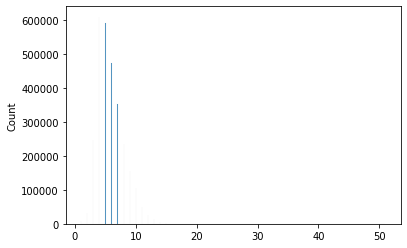

In [ ]:
sns.histplot(x=neg_word_length)



> Despues de la limpieza y creación de nuestro diccionarios podemos observar que las palabras mas usadas, son las que referencian a la Pelicula 



# <font size=6> Preprocesamiento

<font size=3> Una ves visualizado los textos y visto el comportamiento de los datos de acuerdo a cada clasificación, nos proponemos a preparar los datos para entrenar el modelo.

Empezamos creando una nueva columna donde se almacenaran los datos ya preparados. Lo primero que hacemos es aplicar la función *clean_review* definida previamente.



In [ ]:
pos_rev['review_clean'] = pos_rev.review.apply(clean_review)
pos_rev.head()

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love in the time of money is a...
4,"Probably my all-time favorite movie, a story o...",positive,probably my all time favorite movie a story of...


In [ ]:
neg_rev['review_clean'] = neg_rev.review.apply(clean_review)
neg_rev.head()

,review,sentiment,review_clean
0,Basically there's a family where a little boy ...,negative,basically there s a family where a little boy ...
1,"This show was an amazing, fresh & innovative i...",negative,this show was an amazing fresh innovative idea...
2,Encouraged by the positive comments about this...,negative,encouraged by the positive comments about this...
3,Phil the Alien is one of those quirky films wh...,negative,phil the alien is one of those quirky films wh...
4,I saw this movie when I was about 12 when it c...,negative,i saw this movie when i was about when it came...


<font size=3> Procedemos a 'tokenizar' los textos.

In [ ]:
pos_rev['review_clean'] = pos_rev.review_clean.apply(nltk.word_tokenize)
neg_rev['review_clean'] = neg_rev.review_clean.apply(nltk.word_tokenize)

<font size=3> Luego, 'estematizamos' las palabras, es decir, reducimos a su raíz las palabras que tienen un origen común. 

In [ ]:
stemmer = nltk.PorterStemmer()
def more_cleaning(review):
  stemmer = nltk.PorterStemmer()
  words = [stemmer.stem(word) for word in review if word not in stopwords]
  return words


In [ ]:
pos_rev['review_clean'] = pos_rev.review_clean.apply(more_cleaning)
neg_rev['review_clean'] = neg_rev.review_clean.apply(more_cleaning)



<font size=3> Ahora, nos enfocamos en codificar numéricamente los sentimientos, asignamos el valor de 0 para los negativos y de 1 a los positivos.

In [ ]:
neg_rev['sentiment_encoded'] = [0 for _ in range(25000)]
pos_rev['sentiment_encoded'] = [1 for _ in range(25000)]

In [ ]:
neg_rev.head()

,review,sentiment,review_clean,sentiment_encoded
0,Basically there's a family where a little boy ...,negative,"[basic, famili, littl, boy, jake, think, zombi...",0
1,"This show was an amazing, fresh & innovative i...",negative,"[show, amaz, fresh, innov, idea, first, air, f...",0
2,Encouraged by the positive comments about this...,negative,"[encourag, posit, comment, film, look, forward...",0
3,Phil the Alien is one of those quirky films wh...,negative,"[phil, alien, one, quirki, film, humour, base,...",0
4,I saw this movie when I was about 12 when it c...,negative,"[saw, movi, came, recal, scariest, scene, big,...",0


In [ ]:
pos_rev.head()

,review,sentiment,review_clean,sentiment_encoded
0,One of the other reviewers has mentioned that ...,positive,"[one, review, mention, watch, oz, episod, hook...",1
1,A wonderful little production. <br /><br />The...,positive,"[wonder, littl, product, film, techniqu, unass...",1
2,I thought this was a wonderful way to spend ti...,positive,"[thought, wonder, way, spend, time, hot, summe...",1
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"[petter, mattei, love, time, money, visual, st...",1
4,"Probably my all-time favorite movie, a story o...",positive,"[probabl, time, favorit, movi, stori, selfless...",1


<font size=3> Lo que sigue es dividir nuestro *data set* en conjuntos de entrenamiento y prueba. Para garantizar que haya una proporción idéntica de datos con las etiquetas 0 y 1 en ambos conjuntos, lo que hacemos es dividir por separado los *data frames* *'pos_rev'* y *'neg_rev'* en prueba y entenamiento para posteriormente unir los similares.

In [ ]:
# Creamos el conjunto de entrenamiento para las reseñas postivas
train_pos = pos_rev.sample(frac=0.8, random_state=7)
train_pos

,review,sentiment,review_clean,sentiment_encoded
21752,Another detailed work on the subject by Dr Dwi...,positive,"[anoth, detail, work, subject, dr, dwivedi, ta...",1
7208,"Although the plot was a bit sappy at times, an...",positive,"[although, plot, bit, sappi, time, rush, end, ...",1
17058,"Noni Hazlehurst, Colin Friels, Alice Garner, C...",positive,"[noni, hazlehurst, colin, friel, alic, garner,...",1
20754,so. i was completely in love with this movie. ...,positive,"[complet, love, movi, gaga, even, plot, twist,...",1
22505,Being someone who lists Night of the Living De...,positive,"[someon, list, night, live, dead, number, thre...",1
...,...,...,...,...
18965,Yeah I watched this mini series with My Mom an...,positive,"[yeah, watch, mini, seri, mom, dad, kid, one, ...",1
22154,"I love the premise, but it's replay value is o...",positive,"[love, premis, replay, valu, certain, part, op...",1
1253,"Jeff Lieberman's ""Just Before Dawn"" is definit...",positive,"[jeff, lieberman, dawn, definit, one, underr, ...",1
10039,I have to agree with most of the other posts. ...,positive,"[agre, post, comedi, drama, lean, littl, much,...",1


<font size=3> Creamos una máscara con los índices de *'train_pos'* y aplicamos a los demás conjuntos, esto para simplificar la separación y grantizar las misma proporción de reseñas con las dos etiquetas en ambos conjuntos.

In [ ]:
# Ordenamos los índices para optimizar el cómputo
idx = train_pos.sort_index().index.to_list()
# Creamos la máscara
mask = np.array([True if x not in idx else False for x in range(25000)])
# Aplicamos la máscara a 'pos_rev'
test_pos = pos_rev[mask]
test_pos

,review,sentiment,review_clean,sentiment_encoded
6,If you like original gut wrenching laughter yo...,positive,"[like, origin, gut, wrench, laughter, like, mo...",1
7,This a fantastic movie of three prisoners who ...,positive,"[fantast, movi, three, prison, becom, famou, o...",1
10,After the success of Die Hard and it's sequels...,positive,"[success, die, hard, sequel, surpris, realli, ...",1
14,'War movie' is a Hollywood genre that has been...,positive,"[war, movi, hollywood, genr, done, redon, mani...",1
22,Preston Sturgis' THE POWER AND THE GLORY was u...,positive,"[preston, sturgi, power, glori, unseen, public...",1
...,...,...,...,...
24967,I first saw this movie in the night program of...,positive,"[first, saw, movi, night, program, one, favour...",1
24973,Having read all of the comments on this film I...,positive,"[read, comment, film, still, amaz, fox, reluct...",1
24992,"Dog Bite Dog isn't going to be for everyone, b...",positive,"[dog, bite, dog, go, everyon, realli, enjoy, f...",1
24997,I got this one a few weeks ago and love it! It...,positive,"[got, one, week, ago, love, modern, light, fil...",1


In [ ]:
# Aplicamos el complemento de la máscara  a 'neg_rev'
train_neg = neg_rev[~mask]
train_neg

,review,sentiment,review_clean,sentiment_encoded
0,Basically there's a family where a little boy ...,negative,"[basic, famili, littl, boy, jake, think, zombi...",0
1,"This show was an amazing, fresh & innovative i...",negative,"[show, amaz, fresh, innov, idea, first, air, f...",0
2,Encouraged by the positive comments about this...,negative,"[encourag, posit, comment, film, look, forward...",0
3,Phil the Alien is one of those quirky films wh...,negative,"[phil, alien, one, quirki, film, humour, base,...",0
4,I saw this movie when I was about 12 when it c...,negative,"[saw, movi, came, recal, scariest, scene, big,...",0
...,...,...,...,...
24993,"Les Visiteurs, the first movie about the medie...",negative,"[le, visiteur, first, movi, mediev, time, trav...",0
24994,Robert Colomb has two full-time jobs. He's kno...,negative,"[robert, colomb, two, full, time, job, known, ...",0
24995,This is your typical junk comedy.<br /><br />T...,negative,"[typic, junk, comedi, almost, laugh, genuin, m...",0
24996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"[bad, plot, bad, dialogu, bad, act, idiot, dir...",0


In [ ]:
# Aplicamos la máscara a 'neg_rev'
test_neg = neg_rev[mask]
test_neg

,review,sentiment,review_clean,sentiment_encoded
6,The cast played Shakespeare.<br /><br />Shakes...,negative,"[cast, play, shakespear, shakespear, lost, app...",0
7,"Kind of drawn in by the erotic scenes, only to...",negative,"[kind, drawn, erot, scene, realiz, one, amateu...",0
10,I had the terrible misfortune of having to vie...,negative,"[terribl, misfortun, view, b, movi, entireti, ...",0
14,This movie was so frustrating. Everything seem...,negative,"[movi, frustrat, everyth, seem, energet, total...",0
22,"Of all the films I have seen, this one, The Ra...",negative,"[film, seen, one, rage, got, one, worst, yet, ...",0
...,...,...,...,...
24967,This was a very brief episode that appeared in...,negative,"[brief, episod, appear, one, night, galleri, s...",0
24973,"My thoughts on the movie, 9<br /><br />It was ...",negative,"[thought, movi, good, good, visual, great, ple...",0
24992,"Lame, lame, lame!!! A 90-minute cringe-fest th...",negative,"[lame, lame, lame, minut, cring, fest, minut, ...",0
24997,I am a Catholic taught in parochial elementary...,negative,"[cathol, taught, parochi, elementari, school, ...",0


<font size=3> Para entrenar el modelo vamos a realizar una aproximación frecuentista, es decir, los valores con los que vamos a alimentar el algoritmo representan las veces que cada palabra se encontró en las reseñas positivas y negativas. Dicho esto, creamos nuevamente los *'corpus'* y los diccionarios de frecuencias correspondientes. 

In [ ]:
# Creamos los corpus para ambas etiquetas con los datos de entrenamiento
train_neg_corpus = [words[i] for words in train_neg.review_clean for i in range(len(words))]
train_pos_corpus = [words[i] for words in train_pos.review_clean for i in range(len(words))] 

In [ ]:
print('Longitud del corpus positivo:\t', len(train_pos_corpus))
print('\nLongitud del corpus negativo', len(train_neg_corpus))

Longitud del corpus positivo:	 2397697

Longitud del corpus negativo 2341733


In [ ]:
# Creamos nuevamente los diccionarios de frecuencias
neg_freq = nltk.FreqDist(train_neg_corpus)
pos_freq = nltk.FreqDist(train_pos_corpus)

<font size=3> Finalmente unimos los conjuntos positivos y negativos para entrenamiento y prueba.

In [ ]:
data_train = pd.concat([train_neg,train_pos],ignore_index=True)
data_test = pd.concat([test_neg,test_pos],ignore_index=True)

Y para no sesgar el algoritmo, mezclamos el orden.

In [ ]:
data_train = data_train.sample(frac=1)
data_test = data_test.sample(frac=1)

In [ ]:
data_train.head()

,review,sentiment,review_clean,sentiment_encoded
28763,I liked this a lot. <br /><br />The camera ang...,positive,"[like, lot, camera, angl, cool, jumpi, like, b...",1
31760,Watching Fire and Ice for the first time remin...,positive,"[watch, fire, ice, first, time, remind, experi...",1
16002,The final pairing of Nelson Eddy and Jeanette ...,negative,"[final, pair, nelson, eddi, jeanett, macdonald...",0
32249,If you like the excitement of a good submarine...,positive,"[like, excit, good, submarin, drama, fun, good...",1
34400,This indie film looks at the lives of a group ...,positive,"[indi, film, look, live, group, peopl, take, a...",1


In [ ]:
data_test.head()

,review,sentiment,review_clean,sentiment_encoded
5522,This Columbo episode is probably noted more fo...,positive,"[columbo, episod, probabl, note, director, ste...",1
5361,Michael (played by Steven Robertson) has cereb...,positive,"[michael, play, steven, robertson, cereb, pals...",1
5372,"A remarkable piece of documentary, giving a vi...",positive,"[remark, piec, documentari, give, vivid, depic...",1
4403,"First of all, I was expecting ""Caged Heat"" to ...",negative,"[first, expect, cage, heat, along, line, ilsa,...",0
4231,"Think ""stage play"". This is worth seeing once ...",negative,"[think, stage, play, worth, see, perform, lion...",0


<font size=3> Lo que sigue es traducir el texto a números de forma que el algoritmo pueda leerlo, así que creamos la función *'vectorize_review'*, la cual a cada palabra la convierte en un vector con entradas iguales a la frecuencia con que se encuentran en cada *corpus* y la suma de esos vectores representan el vector asociado a cada reseña.

In [ ]:
def vectorize_review(review):
  #Creamos un vector de 3 entradas
  x = np.zeros((1,3))
  # primera entrada igual a 1
  x[0,0] = 1 
  for word in review:
    # Segunda entrada es la suma de la frecuencias de cada palabra positiva en la reseña
    x[0,1] += pos_freq.get(word,0)
    # Tercera entrada es la suma de las frecuencias de cada palabra negativa en la reseña
    x[0,2] += neg_freq.get(word,0)
  return x

In [ ]:
# Aplicamos la función a 'data_train'
data_train['review_vectorized'] = data_train.review_clean.apply(vectorize_review)
data_train.head() 

,review,sentiment,review_clean,sentiment_encoded,review_vectorized
28763,I liked this a lot. <br /><br />The camera ang...,positive,"[like, lot, camera, angl, cool, jumpi, like, b...",1,"[[1.0, 267735.0, 284534.0]]"
31760,Watching Fire and Ice for the first time remin...,positive,"[watch, fire, ice, first, time, remind, experi...",1,"[[1.0, 738725.0, 756284.0]]"
16002,The final pairing of Nelson Eddy and Jeanette ...,negative,"[final, pair, nelson, eddi, jeanett, macdonald...",0,"[[1.0, 132506.0, 134226.0]]"
32249,If you like the excitement of a good submarine...,positive,"[like, excit, good, submarin, drama, fun, good...",1,"[[1.0, 231787.0, 225605.0]]"
34400,This indie film looks at the lives of a group ...,positive,"[indi, film, look, live, group, peopl, take, a...",1,"[[1.0, 300639.0, 272523.0]]"


In [ ]:
# Aplicamos la función a 'data_test'
data_test['review_vectorized'] = data_test.review_clean.apply(vectorize_review)
data_test.head() 

,review,sentiment,review_clean,sentiment_encoded,review_vectorized
5522,This Columbo episode is probably noted more fo...,positive,"[columbo, episod, probabl, note, director, ste...",1,"[[1.0, 305311.0, 314283.0]]"
5361,Michael (played by Steven Robertson) has cereb...,positive,"[michael, play, steven, robertson, cereb, pals...",1,"[[1.0, 621864.0, 558596.0]]"
5372,"A remarkable piece of documentary, giving a vi...",positive,"[remark, piec, documentari, give, vivid, depic...",1,"[[1.0, 297417.0, 302147.0]]"
4403,"First of all, I was expecting ""Caged Heat"" to ...",negative,"[first, expect, cage, heat, along, line, ilsa,...",0,"[[1.0, 247558.0, 272285.0]]"
4231,"Think ""stage play"". This is worth seeing once ...",negative,"[think, stage, play, worth, see, perform, lion...",0,"[[1.0, 217885.0, 207658.0]]"


<font size=3> Definimos el *'target'* como el sentimiento codificado y los *'features'* como la reseña vectorizada.

In [ ]:
y_train = data_train.sentiment_encoded
y_test = data_test.sentiment_encoded

In [ ]:
x_train = np.zeros((len(data_train),3))
x_test = np.zeros((len(data_test),3))

<font size=3> Separamos la reseña vectorizada en cada una de sus entradas en los conjuntos de entrenamiento y prueba, y validamos.

In [ ]:
x_train[:,0] = data_train.review_vectorized.map(lambda x: x[0,0]) 
x_train[:,1] = data_train.review_vectorized.map(lambda x: x[0,1]) 
x_train[:,2] = data_train.review_vectorized.map(lambda x: x[0,2]) 

In [ ]:
x_train[:5]

array([[1.00000e+00, 2.67735e+05, 2.84534e+05],
       [1.00000e+00, 7.38725e+05, 7.56284e+05],
       [1.00000e+00, 1.32506e+05, 1.34226e+05],
       [1.00000e+00, 2.31787e+05, 2.25605e+05],
       [1.00000e+00, 3.00639e+05, 2.72523e+05]])

In [ ]:
x_test[:,0] = data_test.review_vectorized.map(lambda x: x[0,0]) 
x_test[:,1] = data_test.review_vectorized.map(lambda x: x[0,1]) 
x_test[:,2] = data_test.review_vectorized.map(lambda x: x[0,2]) 

In [ ]:
print(' X_train : \n\n', x_train[:10,:])
print('\nY_train: \n\n', y_train[:10])

 X_train : 

 [[1.00000e+00 2.67735e+05 2.84534e+05]
 [1.00000e+00 7.38725e+05 7.56284e+05]
 [1.00000e+00 1.32506e+05 1.34226e+05]
 [1.00000e+00 2.31787e+05 2.25605e+05]
 [1.00000e+00 3.00639e+05 2.72523e+05]
 [1.00000e+00 8.55916e+05 9.20999e+05]
 [1.00000e+00 2.03628e+05 2.09215e+05]
 [1.00000e+00 4.48788e+05 4.13728e+05]
 [1.00000e+00 4.48154e+05 4.62988e+05]
 [1.00000e+00 5.95229e+05 5.84405e+05]]

Y_train: 

 28763    1
31760    1
16002    0
32249    1
34400    1
27380    1
33900    1
32844    1
36087    1
32380    1
Name: sentiment_encoded, dtype: int64




> Los pasos realizados, fuerón para preparar la información y que esta sea fácil de procesar al momento de entrenar



# <font size=6> Entrenamiento del Modelo

<font size=3> Una vez finalizado el preprocesamiento, nos proponemos a crear el modelo. Dado que nuestro objetivo es predecir una clasificación binaria, ocuparemos el algoritmo de Regresión Logística.

In [ ]:
# Importamos la regresión logística
from sklearn.linear_model import LogisticRegression

In [ ]:
# Definimos el modelo y sus hiperparámetros
LR = LogisticRegression(C=0.1, solver='saga')

In [ ]:
# Entrnamos el modelos
LR.fit(x_train,y_train)

LogisticRegression(C=0.1, solver='saga')

# <font size=6> Evaluación del modelo

<font size=3> Con el modelo entrenado, nos proponemos a realizar las predicciones y evaluar la eficacia del modelo.

In [ ]:
# Importamos las métricas a usar
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
# Creamos las predicciones
y_hat = LR.predict(x_test)

<font size=3> Empezamos midiendo la precisión del modelo para darnos una idea de su desempeño.

In [ ]:
print('Precisión del modelo:\t ',(accuracy_score(y_test, y_hat)))

Precisión del modelo:	  0.696


<font size=3> Vemos que aproximadamente 70% de las reseñas las clasificó correctamente, lo cual consideramos como un desempeño regular.

Creamos una matriz de confusión para visualizar las clasificaciones hechas y la cantidad de falsos positivos y falsos negativos.

Text(87.0, 0.5, 'True')

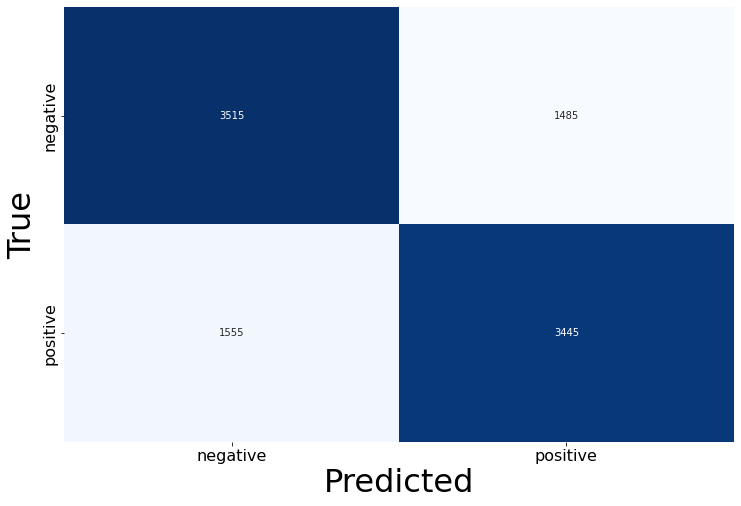

In [ ]:
cm = confusion_matrix(y_test, y_hat)
fig = plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=True, cmap= plt.cm.Blues, cbar=False, fmt='g')
plt.yticks([0.5,1.5], labels=list(data.sentiment.unique()), size=16)
plt.xticks([0.5,1.5], labels=list(data.sentiment.unique()), size=16)
plt.xlabel('Predicted', size=32)
plt.ylabel('True', size=32)

<font size=3> Por último, creamos el reporte con las diferentes métricas que nos enriquecen la información previamente visualizada.

In [ ]:
report = pd.DataFrame(classification_report(y_hat, y_test, target_names= list(data.sentiment.unique()), output_dict=True))
report

,negative,positive,accuracy,macro avg,weighted avg
precision,0.703000,0.689000,0.696,0.696000,0.696098
recall,0.693294,0.698783,0.696,0.696038,0.696000
f1-score,0.698113,0.693857,0.696,0.695985,0.696015
support,5070.000000,4930.000000,0.696,10000.000000,10000.000000




> Realizamos un entrenamiento supervisado el cúal nos dió una confianza al momento de realizar el análisis de los resultados cercano al 70 %



#  <font size=6> Visualización

Para tener una visualización mas gráficas de nuestra data decidimos realizar dos formas de visualizarlas

Primero haremos un TreeMap con nuestros valores de reseñas negativas y positivas

In [ ]:
import plotly.express as px
dataTree=pd.DataFrame(data.groupby('sentiment').count())#Realizamos la agrupación para obtener el total de Reviews
dataTree['sentiment'] = dataTree.index #Convertimos nuestros indices en las etiquetas a usar
fig = px.treemap(dataTree, path=['sentiment'], values='review', width=800, height=400)
fig.data[0].textinfo='label+value'
fig.layout.hovermode = False
fig.show()


Cómo lo mencionamos Previamente nuestra Reviews contienen el mismo numero de posigivas y Negativas. Lo cuál es más fácil de visualizar con el Gráfico

La siguiente será un "WordCloud", con la cual podremos identificar de manéra gráfica las palabras mas usadas

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(colormap='winter')
neg_words = neg_rev.review_clean.apply(lambda x: ' '.join(x))
pos_words = pos_rev.review_clean.apply(lambda x: ' '.join(x))


Valoraciones Negativas

(-0.5, 399.5, 199.5, -0.5)

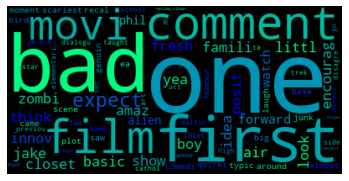

In [ ]:
wordcloud.generate(str(neg_words))
plt.imshow(wordcloud, interpolation ='bilinear')
plt.axis('off')

Valoraciones Positivas

(-0.5, 399.5, 199.5, -0.5)

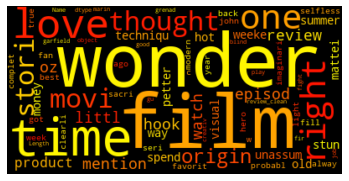

In [ ]:
wordcloud = WordCloud(colormap='autumn')
wordcloud.generate(str(pos_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

Con esta última Visualización podemos se logra ver que las palabras mas usadas en conmentarios negativos son Bad y Film.

Mientras que de las valoraciones positivas Son Wonder, Right y Love